In [12]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

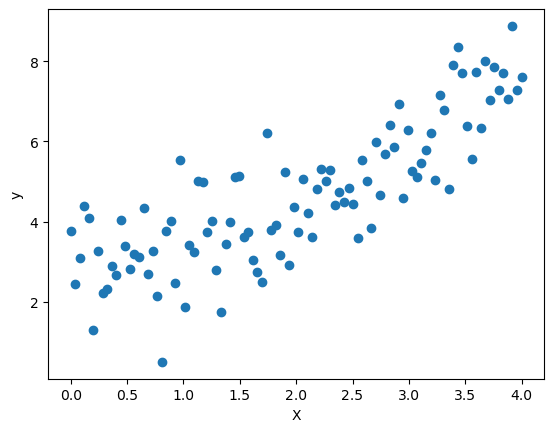

In [13]:
np.random.seed(0)

m = 100
X = np.linspace(0, 4, m).reshape(m, 1)
y = 2 + X*1.3 + np.random.randn(m, 1)
y = y.ravel()

plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

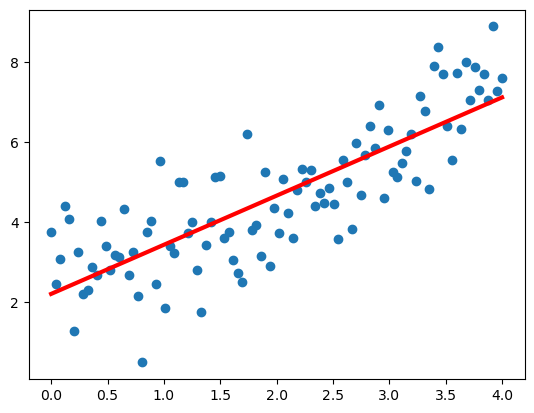

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red', lw=3)

In [15]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, y_pred)

0.8051083770818456

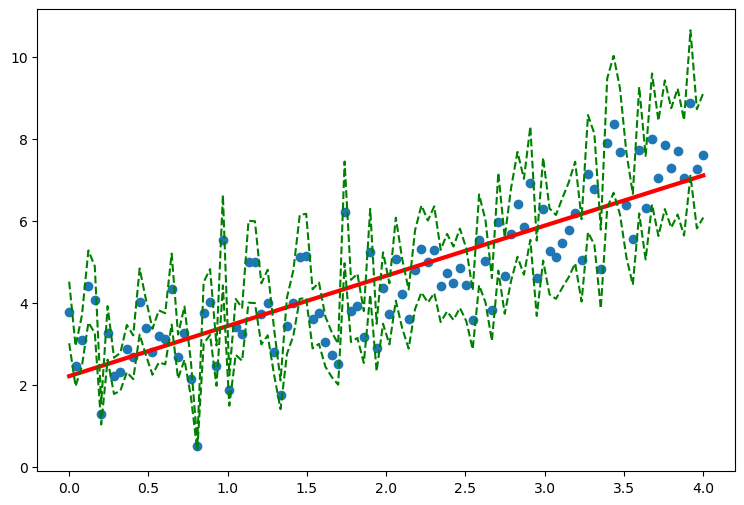

In [16]:
plt.figure(figsize=(9, 6))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', lw=3)
plt.plot(X, y + y*0.2, c='g', ls='--')
plt.plot(X, y - y*0.2, c='g', ls='--')

#score make

In [17]:
def custom_metric(y, y_pred):
    return np.sum((y_pred < y + y*0.2) & (y_pred > y - y*0.2)) / len(y)

custom_metric(y, y_pred)

0.66

In [18]:
from sklearn.metrics import make_scorer

In [19]:
custom_scorer = make_scorer(custom_metric, greater_is_better=True)

In [20]:
from sklearn.model_selection import cross_val_score, GridSearchCV

cross_val_score(LinearRegression(), X, y, cv=3, scoring=custom_scorer)

array([0.23529412, 0.60606061, 0.42424242])

In [21]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', degree=3)
params = {'gamma':np.arange(0.1, 1, 0.05)}

In [22]:
gird = GridSearchCV(model, params, cv=3, scoring=custom_scorer)